# **Predicting the white wine quality based on the chemical characteristic of the wine**

### Yimeng Sun, Pedro Maia Machado Hernandes, Emporio Anih, Haowen Yang

## Introduction

White wine quality is a complex interplay of several integrating factors. During the production and storage of white wine, an oxidation reaction occurs, leading to the loss of certain fruit aromas and the decrease of white wine quality. In our study, we intend to use knn method to investigate **if the quality of white wines can be predicted based on different character traits of the wine**. The wine quality will be determined using a 9-point scale. The predictors we selected for prediction are volatile acidity, chlorides, density, pH level, and sulphates, and the process of determining the predictors will be shown in the data exploratory part. 
 
The dataset we will be using in the study is related to white variants of the Portuguese "Vinho Verde" wine: https://archive.ics.uci.edu/dataset/186/wine+quality. (Note: The original dataset contains both red wine and white wine. Since the data on white wine provides more cases, we will focus on white wine in our study.)
The columns and the explanations are as follows:

* **fixed acidity**: The set of low volatility organic acids such as malic, lactic, tartaric or citric acids in wine.
* **volatile acidity**: The wine's gaseous acids that contributes to the smell and taste of vinegar in wine.
* **citric.acid**: The amount of citric acid in wine.
* **residual.sugar**: The residual sugar in the wine after the sugar fermentation carried out by yeasts.
* **chlorides**: The chlorides amount in wine.
* **free sulfur dioxide**: The unreacted components and is made up of mostly the molecular (SO2) and bisulfite (HSO3 -) forms. 
* **total.sulfur.dioxide**: The total amount of sulfur dioxide in wine.
* **density**: The density of wine.
* **pH**: Measure of how acidic/basic wine.
* **sulphates**: The content of sulphates in wine.
* **alcohol**: The alcohol amount in wine.

## Methods and Results

#### Preprocessing and exploratory data analysis
1. Imported libraries and download dataset from the internet.

2. Split the data into training and testing sets, working only with the training set until the very end.

3. Summarized the training set to make predictions about how we want our classifier to work.

4. Visualized the relationship between each variable and wine quality and choose predictors

#### Building KNN classification model

1. Balancing the data set

Since the original dataset does not have equal distribution across each quality (most points are accumulated around the quality 5-7), we balance the dataset to ensure our prediction model can predict each quality properly.

2. Use the recipe function to center and scale the data.

Perform cross-validation with 5 folds, using `vfold_cv` on the balanced training data. We use 5 folds because if we only split the data once, the results strongly depend on the observations that end up being in the validation set, so using more folds increases the accuracy.

Create a k-nearest model with `neighbours = tune()` instead of a value to find the best value of k for k-nearest neighbours.

Add the recipe and model to a workflow, using `tune_grid` to fit. This worfklow runs cross validation on a range of 
k-nearest neighbours values that is specified in gridvals.

Find the best k value by filtering for accuracy an plotting a line plot with the accuracy estimate on the y-axis and 
neighbours on the x-axis. We also filtered for roc_auc and plotted a line plot with the  roc_auc score on the y-axis and 
neighbours on the x-axis. Based on the two plots, we selected k=1, k=2, k=4 and k=5.

#### Testing our classifier and choosing the best k value

Retrain the model with the selected k values and select the target model which has the highest accuracy in predicting testing set.

Made a new model specification for the selected four k values, combined with the recipe made earlier in a workflow, and fit the classifier to our balanced training set.

Used predict on the testing set to evaluate the classifier's prediction accuracy on data it hadn't seen before.

Produced a confusion matrix to get a sense of which classifier was more accurate.

Compared the accuracy of four model. Among the four model with k=1, k=2, k=4 and k=5, the accuracy of predicting testing set is the highest when k=1 and k=2, thus the best classifier we choose is the model with k=1 or k=2. Our classifier was 90.36% accurate and labeled 1107 out of 1225 observations correctly.

### Preprocessing and Exploratory data analysis 

In [1]:
install.packages("cowplot")
install.packages("themis")
install.packages("kknn") 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Here we installed the libraries kknn to create our prediction model, cowplot to arrange the plots from the exploratory analysis, and themis to balance the dataset.


In [2]:
# Loading package

library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(themis)
library(kknn)
options(repr.matrix.max.rows = 9)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

ERROR: Error in library(cowplot): there is no package called ‘cowplot’


In [8]:
# Import dataset

download.file("https://github.com/PedroMMHernandes/GroupProject_DSCI/raw/main/wine.zip", "wine.zip")
unzip("wine.zip", "winequality-white.csv")


In [9]:
set.seed(2024)

white_wine_data <- read_csv2("winequality-white.csv", show_col_types = FALSE) #|>#read the dataframe
#    mutate_if(is.character, as.numeric) |>
#    mutate(quality = as.factor(quality))

head(white_wine_data)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6


**Table 1: Original data set**

The variables in this data set are used to assess the quality of the wine and have some relationship with the quality of wine. Now we will explore which of them are ideal for being chosen as predictors in white wine prediction.

#### Splitting our data into training and testing sets
Before working on our model, we need to split our data into training and testing sets. We will use initial_split to split our dataframe into 75% training and 25% testing, since it shuffles our data for us and ensures an constant proportion of each class is present in both. 

In [9]:
#split of the unbalanced dataset

wine_data_split <- white_wine_data |>           
    initial_split(prop = 0.75, strata = quality)  
wine_data_train <- training(wine_data_split)    
wine_data_test <- testing(wine_data_split)      


In [17]:
# the summary of the training data set 
summary(wine_data_train)

wine_data_train |> 
group_by(quality) |>
summarise(across(`fixed acidity`: `alcohol`, mean, na.rm = TRUE))

 fixed acidity    volatile acidity  citric acid    residual sugar  
 Min.   :  5.00   Min.   :0.0800   Min.   :0.000   Min.   : 0.600  
 1st Qu.: 61.00   1st Qu.:0.2100   1st Qu.:0.270   1st Qu.: 1.700  
 Median : 67.00   Median :0.2600   Median :0.320   Median : 5.250  
 Mean   : 62.45   Mean   :0.2781   Mean   :0.334   Mean   : 6.401  
 3rd Qu.: 73.00   3rd Qu.:0.3200   3rd Qu.:0.390   3rd Qu.: 9.850  
 Max.   :715.00   Max.   :1.1000   Max.   :1.660   Max.   :65.800  
                                                                   
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.00900   Min.   :   2.00     Min.   :  18.0       Min.   :0.9874  
 1st Qu.:0.03600   1st Qu.:  23.00     1st Qu.: 108.0       1st Qu.:0.9918  
 Median :0.04300   Median :  34.00     Median : 134.0       Median :0.9938  
 Mean   :0.04595   Mean   :  41.25     Mean   : 148.8       Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.:  46.00     3rd Qu.: 168.0       3rd Qu.:0.9

quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,73.40000,0.3316667,0.3420000,5.166667,0.05680000,204.40000,335.6000,0.9943493,283.4667,0.4533333,8.240000e+01
4,64.63710,0.3874597,0.2915323,4.538306,0.05045161,42.43548,142.2339,0.9941348,289.6855,0.4679839,9.595968e+01
5,64.50909,0.3005818,0.3381818,7.308591,0.05202364,40.52727,154.6609,0.9952705,287.6655,0.4823545,3.130606e+12
6,61.81448,0.2600395,0.3378954,6.478650,0.04511618,40.05049,146.0620,0.9939711,286.6831,0.4907786,1.280211e+12
7,60.80945,0.2647332,0.3255030,5.211966,0.03814024,42.33384,132.6387,0.9924701,286.0518,0.5064177,1.398171e+12
8,58.00000,0.2733333,0.3293182,5.731818,0.03918182,37.23485,200.1288,0.9923600,301.1818,0.4892424,1.035076e+02
9,72.50000,0.2500000,0.4250000,2.100000,0.03150000,29.00000,126.0000,0.9904250,332.5000,0.4500000,1.270000e+02


**Tables 2 and 3: The summary of the data set**

From these tables we could analyze some initial behavior from each variable. From table 2 we could see how spread each variable is, allowing us to have some ideas regarding how to continue. The possible predictors that showed some bad signs were "Fixed acidity", " free sulfur dioxide", "total sulfur dioxide", and "residual sugar" because all of them indicated to have outliers way outside the mean, which could result in a bad proportion after being scaled. 

In order to confirm this, and take a better look into the other variables we plotted density graphs with the variables in relation to the quality, as seen below:

#### Visualizing the relationship between each variable and wine quality and choose predictors

Warning message:
“Removed 3 rows containing non-finite values (`stat_density()`).”


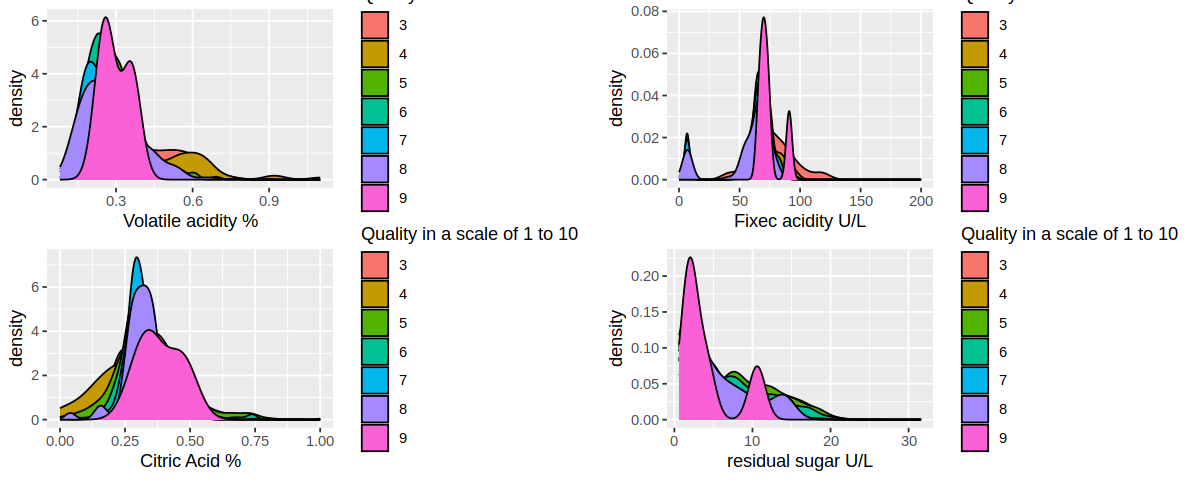

Warning message:
“Removed 55 rows containing non-finite values (`stat_density()`).”


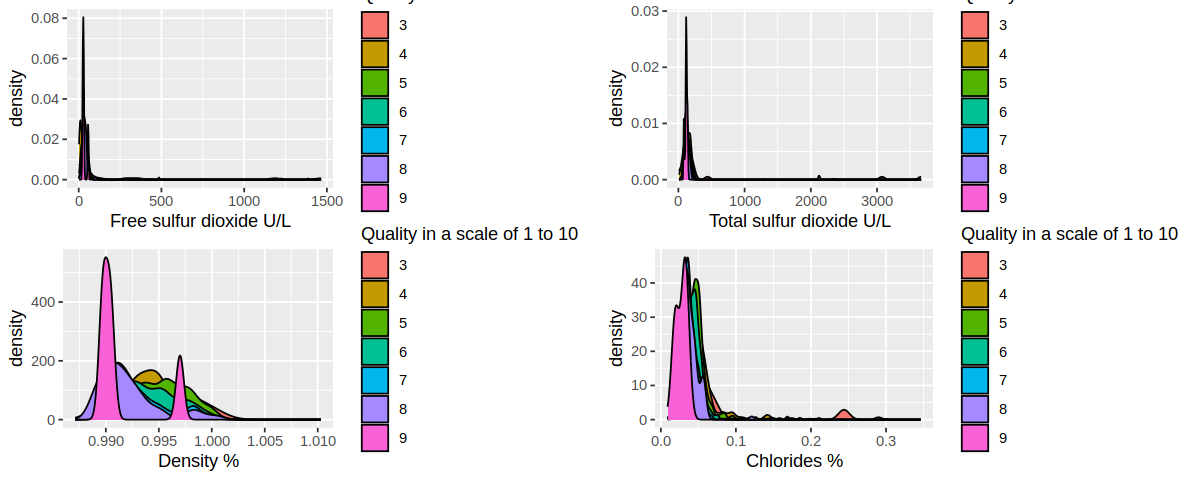

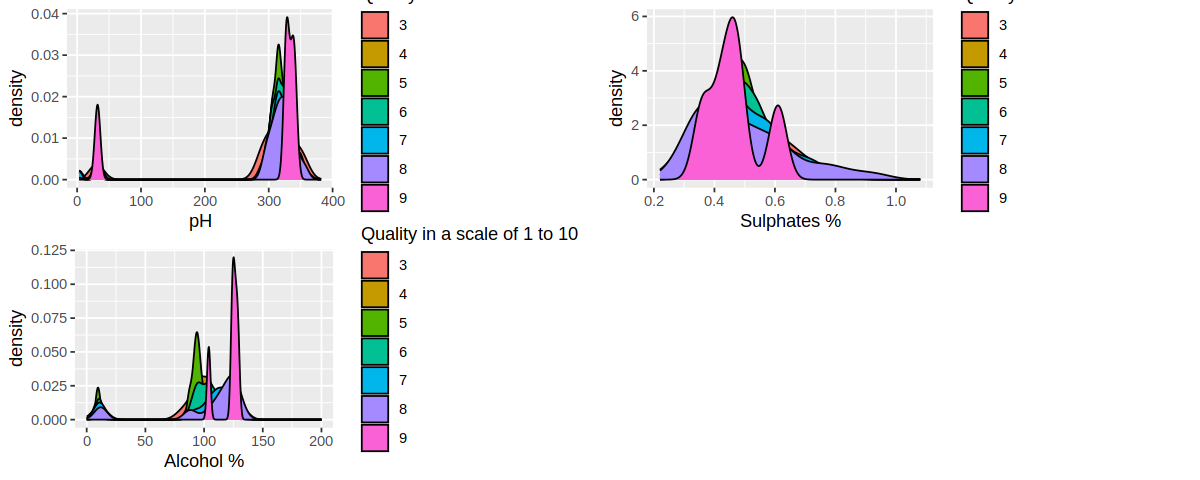

In [21]:
#GGpair plot set 1

options(repr.plot.width = 10, repr.plot.height = 4)

plot_va <- wine_data_train |>
    ggplot(aes(x = `volatile acidity`, fill = quality),) +
    geom_density() +
    labs(x = "Volatile acidity %", fill = "Quality in a scale of 1 to 10") 
    
plot_fa <- wine_data_train |>
    ggplot(aes(x = `fixed acidity`, fill = quality),) +
    geom_density() +
    labs(x = "Fixec acidity U/L", fill = "Quality in a scale of 1 to 10") +
    xlim(0,200)
    
plot_ca <- wine_data_train |>
    ggplot(aes(x = `citric acid`, fill = quality),) +
    geom_density() +
    labs(x = "Citric Acid %", fill = "Quality in a scale of 1 to 10") 
    
plot_rs <- wine_data_train |>
    ggplot(aes(x = `residual sugar`, fill = quality),) +
    geom_density() +
    labs(x = "residual sugar U/L", fill = "Quality in a scale of 1 to 10")
    
plot_ch <- wine_data_train |>
    ggplot(aes(x = `chlorides`, fill = quality),) +
    geom_density() +
    labs(x = "Chlorides %", fill = "Quality in a scale of 1 to 10") 
    
plot_fsd <- wine_data_train |>
    ggplot(aes(x = `free sulfur dioxide`, fill = quality),) +
    geom_density() +
    labs(x = "Free sulfur dioxide U/L", fill = "Quality in a scale of 1 to 10") 
    
plot_tsd <- wine_data_train |>
    ggplot(aes(x = `total sulfur dioxide`, fill = quality),) +
    geom_density() +
    labs(x = "Total sulfur dioxide U/L", fill = "Quality in a scale of 1 to 10") 
    
plot_de <- wine_data_train |>
    ggplot(aes(x = `density`, fill = quality),) +
    geom_density() +
    labs(x = "Density %", fill = "Quality in a scale of 1 to 10") 
    
plot_ph <- wine_data_train |>
    ggplot(aes(x = `pH`, fill = quality),) +
    geom_density() +
    labs(x = "pH", fill = "Quality in a scale of 1 to 10") 


plot_su <- wine_data_train |>
    ggplot(aes(x = `sulphates`, fill = quality),) +
    geom_density() +
    labs(x = "Sulphates %", fill = "Quality in a scale of 1 to 10") 
    
plot_al <- wine_data_train |>
    ggplot(aes(x = `alcohol`, fill = quality),) +
    geom_density() +
    #scale_x_log10()+
    labs(x = "Alcohol %", fill = "Quality in a scale of 1 to 10")
    

plot_grid(plot_va, plot_fa, plot_ca, plot_rs) 
plot_grid(plot_fsd, plot_tsd, plot_de, plot_ch) 
plot_grid(plot_ph, plot_su, plot_al)



**Figure 1: GGplot set 1**

Caption: It shows that there are distinctions between different white wine quality in the density plots of volatile acidity, chlorides, density, pH level, and sulphates. Therefore, these factors are the driving factors behind different white wine quality, indicating these variables are suitable to be predictors. 

We eliminated variables that appeared to have smaller variances between quality, or predictors with uneven scales. 

In order to confirm the existence of a possible connection between the predictors we plotted some relations in scatterplots to visualize them.

In [1]:
##GGpair plot set 2

options(repr.plot.width = 10, repr.plot.height = 2)

plot_ch_by_va <- wine_data_train |>
    ggplot(aes(x = `chlorides`, y = `volatile acidity` )) +
    facet_grid(cols = vars(quality)) +
    geom_point()+ 
    labs(y = "Volatile acidity %", x = " chlorides %")

plot_va_by_de <- wine_data_train |>
    ggplot(aes(x = `volatile acidity`, y = `density` )) +
    facet_grid(cols = vars(quality)) +
    geom_point()+
    labs(x = "Volatile acidity %", y = " Density %")

plot_ph_by_su <- wine_data_train |>
    ggplot(aes(x = `pH`, y = `sulphates` )) +
    facet_grid(cols = vars(quality)) +
    geom_point()+ 
    labs(x = "pH", y = " sulphates %")+
    xlim(0, 200)


plot_ch_by_va
plot_va_by_de
plot_ph_by_su

ERROR: Error in ggplot(wine_data_train, aes(x = chlorides, y = `volatile acidity`)): could not find function "ggplot"


**Figure 2: GGplot set 2**

Caption: In these plots we could see some stronger relationships between chlorides and volatile acidity. We could see a similar relation that the points scattered more for the middle qualities and concentrated along the edge cases. With this we could determine our choice of predictors was consistent to be used at the model.

Now we have determined that *volatile acidity, chlorides, density, pH level, and sulphates* are suitable predictors. Then we filter the data set by only keeping these 5 variables and removing other variables .

In [11]:
#filter the data

wine_data_clean <- read_csv2("winequality-white.csv", show_col_types = FALSE) |>
    mutate_if(is.character, as.numeric) |>
    mutate(quality = as.factor(quality)) |>
    select(quality, `volatile acidity`, `chlorides`, `density`, `pH`, `sulphates` )

wine_data_clean

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



quality,volatile acidity,chlorides,density,pH,sulphates
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.27,0.045,1.0010,3,0.45
6,0.30,0.049,0.9940,33,0.49
6,0.28,0.050,0.9951,326,0.44
6,0.23,0.058,0.9956,319,0.40
6,0.23,0.058,0.9956,319,0.40
⋮,⋮,⋮,⋮,⋮,⋮
5,0.32,0.047,0.99490,315,0.46
6,0.24,0.041,0.99254,299,0.46
7,0.29,0.022,0.98869,334,0.38


**Table 3: Cleaned data**

### Building KNN classification model 

#### Balancing the data set

Since the original dataset does not have equal distribution across each quality (most points are accumulated around the quality 5-7), we balance the dataset to ensure our prediction model can predict each quality properly. 

In [14]:
#Creates a recipe to balance the data

wine_recipe_balance <- recipe(quality ~ ., data = wine_data_clean)|>
    step_upsample(quality, over_ratio = 1, skip = FALSE) |>
    prep()
wine_recipe_balance 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Training data contained 4898 data points and no missing data.

Operations:

Up-sampling based on quality [trained]

In [15]:
#Creates the balanced dataset

balanced_wine <- bake(wine_recipe_balance, wine_data_clean)
balanced_wine |> group_by(quality) |> summarise(n = n())

quality,n
<fct>,<int>
3,2198
4,2198
5,2198
6,2198
7,2198
8,2198
9,2198


**Table 4: Balanced data set**

#### Building the classification model

In [16]:
set.seed(2024)

wine_data_split_2 <- balanced_wine |>           #split the balanced dataset
    initial_split(prop = 0.75, strata = quality)


wine_data_train_2 <- training(wine_data_split_2)#training dataset balancedd

wine_data_test_2 <- testing(wine_data_split_2)  #testing dataset balanced

wine_vfold <- vfold_cv(wine_data_train_2, v = 5, strata = quality) #5 fold split off the balanced training dataset


In [17]:
#tuning specs of the data

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 


In [18]:
#scaling and centering the data on the recipe

wine_recipe <- recipe(quality ~ ., data = wine_data_train_2 )|>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

In [19]:
#tunes the data with k from 1 to 20
k_vals <- tibble(neighbors = seq(from = 1, to = 20))
wine_tune <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = wine_vfold, grid = k_vals) |>
    collect_metrics()
wine_tune
    

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9011729,5,0.003663154,Preprocessor1_Model01
1,roc_auc,hand_till,0.9423509,5,0.002136840,Preprocessor1_Model01
2,accuracy,multiclass,0.9011729,5,0.003663154,Preprocessor1_Model02
2,roc_auc,hand_till,0.9480404,5,0.002351791,Preprocessor1_Model02
3,accuracy,multiclass,0.8511538,5,0.003946463,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,accuracy,multiclass,0.6936462,5,0.0053361430,Preprocessor1_Model19
19,roc_auc,hand_till,0.9287344,5,0.0008900950,Preprocessor1_Model19
20,accuracy,multiclass,0.6884462,5,0.0045748370,Preprocessor1_Model20


**Table 5**

#### Visualizing the accuracies of different K and choosing the best K value candidate

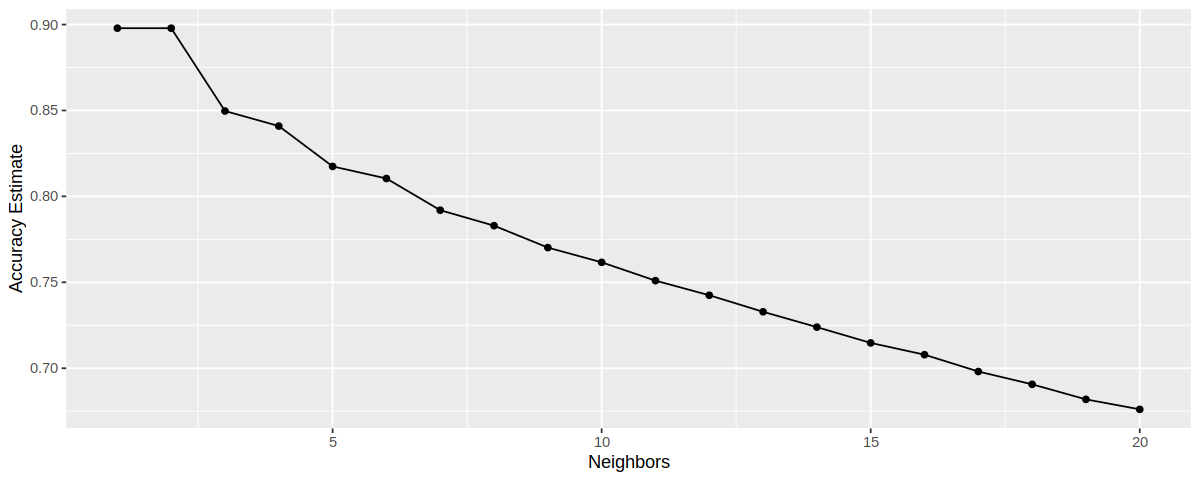

In [29]:
#uses the accuracy matrix to make a plot

accuracy_versus_k <- wine_tune |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") 

accuracy_versus_k

**Figure 3: Plot of estimated accuracy versus the number of neighbors**

From the plot we see that when k = 1 or 2, the accuracy is the same and reach the highest. Therefore, we choose k = 1 and k=2 as our k value candidates. But here k = 1 or 2 might lead to a biased model, so we also visualize roc_auc matrix for best k value selection.

#### Visualizing the roc_auc of different K and choosing the best K value candidate

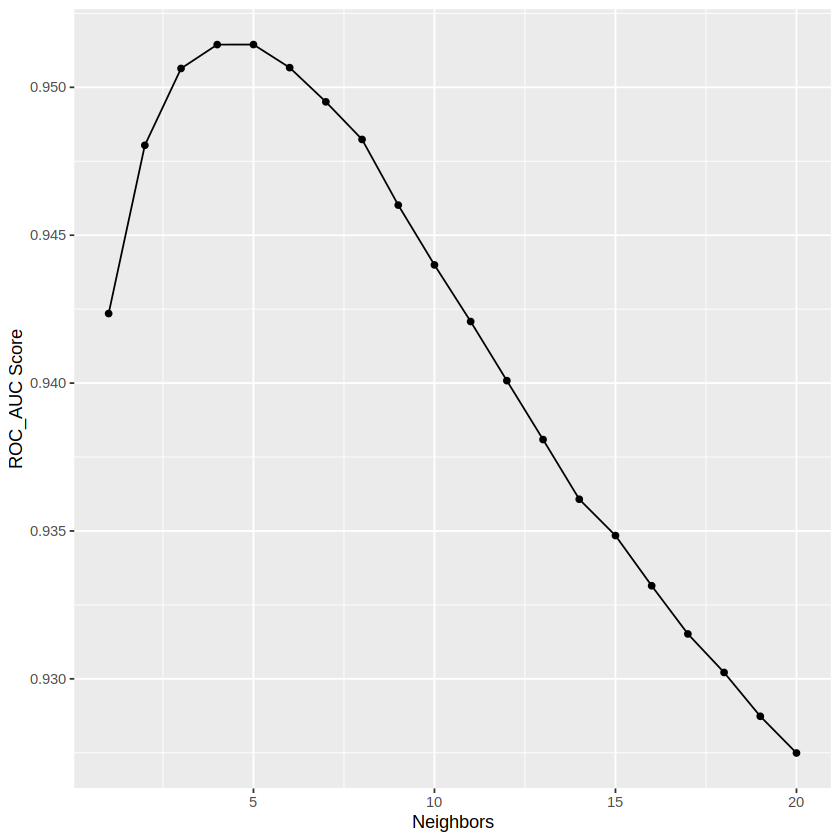

In [25]:
#uses the roc_auc matrix to make a plot

roc_auc_versus_k <- wine_tune |>
    filter(.metric == "roc_auc") |>
    ggplot(aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "ROC_AUC Score") 

roc_auc_versus_k

**Figure 4: Plot of estimated ROC_AUC score versus the number of neighbors**

The higher the ROC_AUC score, the better the model's performance at distinguishing between each class. Since the ROC_AUC score reach the highest point as k=4 and k=5, we choose k=4 and k=5 as our best k candidates.

### Retrain the model

Now we retrain our model using k=1, k=2, k=4 and k=5. The model with the highest prediction accuracy on testing set will be  our target model.

#### Retrain the model with the K=1

In [20]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    fit(wine_data_train_2)

wine_fit

#runs the test data and measures it's accuracy and confusion matrix

wine_predictions <- wine_fit |>
predict(wine_data_test) |>
bind_cols(wine_data_test)
wine_predictions

mnist_metrics <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |>
    filter(.metric == "accuracy")
mnist_metrics

wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.08157074
Best kernel: rectangular
Best k: 1

.pred_class,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6
6,72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.40,99,6
6,62,0.32,0.16,7.0,0.045,30,136,0.9949,318,0.47,96,6
6,7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
6,81,0.22,0.43,1.5,0.044,28,129,0.9938,322,0.45,11,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,57,0.21,0.32,1.6,0.030,33,122,0.99044,333,0.52,1.190000e+02,6
6,66,0.34,0.40,8.1,0.046,68,170,0.99494,315,0.50,9.533333e+14,6
6,49,0.47,0.17,1.9,0.035,60,148,0.98964,327,0.35,1.150000e+02,6


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9036735


          Truth
Prediction   3   4   5   6   7   8   9
         3   5   0   2   2   0   0   0
         4   0  39   8   0   0   0   0
         5   0   0 302  24   1   0   0
         6   0   0  39 507  15   0   0
         7   0   0   5  16 208   0   0
         8   0   0   1   4   0  43   0
         9   0   0   0   1   0   0   3

**Table 6: The prediction on testing set with k=1**

**Table 7: The accuracy of predicting testing set with k=1**

**Table 8: The confusion matrix of predicting testing set with k=1**

#### Retrain the model with the K=2

In [23]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    fit(wine_data_train_2)

wine_fit

#runs the test data and measures it's accuracy and confusion matrix

wine_predictions <- wine_fit |>
predict(wine_data_test) |>
bind_cols(wine_data_test)
wine_predictions

mnist_metrics <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |>
    filter(.metric == "accuracy")
mnist_metrics

wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1149445
Best kernel: rectangular
Best k: 2

.pred_class,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6
6,72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.40,99,6
6,62,0.32,0.16,7.0,0.045,30,136,0.9949,318,0.47,96,6
6,7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
6,81,0.22,0.43,1.5,0.044,28,129,0.9938,322,0.45,11,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,57,0.21,0.32,1.6,0.030,33,122,0.99044,333,0.52,1.190000e+02,6
6,66,0.34,0.40,8.1,0.046,68,170,0.99494,315,0.50,9.533333e+14,6
6,49,0.47,0.17,1.9,0.035,60,148,0.98964,327,0.35,1.150000e+02,6


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9036735


          Truth
Prediction   3   4   5   6   7   8   9
         3   5   0   2   2   0   0   0
         4   0  39   8   0   0   0   0
         5   0   0 302  24   1   0   0
         6   0   0  39 507  15   0   0
         7   0   0   5  16 208   0   0
         8   0   0   1   4   0  43   0
         9   0   0   0   1   0   0   3

**Table 9: The prediction on testing set with k=2**

**Table 10: The accuracy of predicting testing set with k=2**

**Table 11: The confusion matrix of predicting testing set with k=2**

#### Retrain the model with the K=4

In [28]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    fit(wine_data_train_2)

wine_fit

#runs the test data and measures it's accuracy and confusion matrix

wine_predictions <- wine_fit |>
predict(wine_data_test) |>
bind_cols(wine_data_test)
wine_predictions

mnist_metrics <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |>
    filter(.metric == "accuracy")
mnist_metrics

wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1566401
Best kernel: rectangular
Best k: 4

.pred_class,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6
6,72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.40,99,6
6,62,0.32,0.16,7.0,0.045,30,136,0.9949,318,0.47,96,6
6,7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
6,81,0.22,0.43,1.5,0.044,28,129,0.9938,322,0.45,11,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,57,0.21,0.32,1.6,0.030,33,122,0.99044,333,0.52,1.190000e+02,6
6,66,0.34,0.40,8.1,0.046,68,170,0.99494,315,0.50,9.533333e+14,6
8,49,0.47,0.17,1.9,0.035,60,148,0.98964,327,0.35,1.150000e+02,6


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7020408


          Truth
Prediction   3   4   5   6   7   8   9
         3   5   0   4   3   1   0   0
         4   0  39  23  16   1   0   0
         5   0   0 253  90   6   0   0
         6   0   0  50 329  26   0   0
         7   0   0  19  85 188   0   0
         8   0   0   7  29   2  43   0
         9   0   0   1   2   0   0   3

**Table 12: The prediction on testing set with k=4**

**Table 13: The accuracy of predicting testing set with k=4**

**Table 14: The confusion matrix of predicting testing set with k=4**

#### Retrain the model with the K=5

In [27]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    fit(wine_data_train_2)

wine_fit

#runs the test data and measures it's accuracy and confusion matrix

wine_predictions <- wine_fit |>
predict(wine_data_test) |>
bind_cols(wine_data_test)
wine_predictions

mnist_metrics <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |>
    filter(.metric == "accuracy")
mnist_metrics

wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.17207
Best kernel: rectangular
Best k: 5

.pred_class,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6
6,72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.40,99,6
5,62,0.32,0.16,7.0,0.045,30,136,0.9949,318,0.47,96,6
5,7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
6,81,0.22,0.43,1.5,0.044,28,129,0.9938,322,0.45,11,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,57,0.21,0.32,1.6,0.030,33,122,0.99044,333,0.52,1.190000e+02,6
6,66,0.34,0.40,8.1,0.046,68,170,0.99494,315,0.50,9.533333e+14,6
8,49,0.47,0.17,1.9,0.035,60,148,0.98964,327,0.35,1.150000e+02,6


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6310204


          Truth
Prediction   3   4   5   6   7   8   9
         3   5   0   4   4   1   1   0
         4   0  39  30  28   1   0   0
         5   0   0 237 112   7   0   0
         6   0   0  46 265  31   0   0
         7   0   0  30 107 182   0   0
         8   0   0   9  36   2  42   0
         9   0   0   1   2   0   0   3

**Table 15: The prediction on testing set with k=5**

**Table 16: The accuracy of predicting testing set with k=5**

**Table 17: The confusion matrix of predicting testing set with k=5**

Among the four model with k=1, k=2, k=4 and k=5, the accuracy of predicting testing set is the highest when k=1 and k=2, thus the best classifier we choose is the model with k=1 or k=2. Our classifier was 90.36% accurate and labeled 1107 out of 1225 observations correctly. 

Since our model is built based on a specific data set, it fits well for this data set but might not perform well in predicting other white wine data set. In the future, we could improve our classification model by involving more data to build the model. 

## Discussion

### Summary of findings vs expectations:
This study used a k-nearest neighbors (knn) classification approach to predict the quality of white wines based on various chemical attributes. We are expecting a high accuracy for our classifier. After the exploratory data analysis, we selected volatile acidity, chlorides, density, pH level, and sulphates as our predictors. 

Our findings indicate that the knn classification model, with k=1 or k=2, demonstrated an accuracy of approximately 90.36% in predicting the quality of white wines based on the chemical attributes listed above. This result aligns with expectations, as a lower k value means the model considers fewer neighbors when making predictions, which can be beneficial when the dataset has distinct clusters. 

In the existing studies, it has been proved to have at least a 49.9% accuracy in correctly predicting the quality of wine given the parameters similar to those that we have selected (Yan, 2023). The accuracy in our study is even higher.

### Impact of our findings:

These findings could have implications for winemakers and consumers, providing insights into which wine characteristics contribute significantly to quality ratings. Winemakers could use this information to adjust their production processes to enhance specific traits associated with higher quality. For consumers, understanding the influential factors in wine quality may aid in making more informed choices based on personal preferences.

### What future questions could this lead to?

Future questions arising from this study could delve into the impact of additional features on wine quality, explore the applicability of different classification algorithms, or investigate how predictive models generalize to wines from different regions or varieties. Additionally, understanding the nuances of individual preferences within each quality category could lead to more tailored recommendations for both winemakers and consumers.

In conclusion, the study provides a foundation for predicting white wine quality based on chemical attributes, and the findings open avenues for further research and application in the winemaking industry (Cortez et al.).

## Reference

* Cortez, Paulo, et al. “Modeling Wine Preferences by Data Mining from Physicochemical Properties.” Decision Support Systems, vol. 47, no. 4, Nov. 2009, pp. 547–553, https://doi.org/10.1016/j.dss.2009.05.016. Accessed 24 Nov. 2019.

* Wine Quality Dataset. “UCI Machine Learning Repository.” Archive.ics.uci.edu, archive.ics.uci.edu/dataset/186/wine+quality.

* Yan, J. (2023). White Wine Quality Prediction and Feature Importance Analysis Based on Chemical Composition and Machine Learning Models. Highlights in Science, Engineering and Technology, 41, 151–157. https://doi.org/10.54097/hset.v41i.6800